# **Analyse Health and Demographic Data to identify common traits leading to Heart Disease**
- *Mentored Project under Practo*

## Installation

In [1]:
%%capture
!pip install imblearn
!pip install xgboost
!pip install python-dotenv

## Imporiting

In [3]:
# Data Handling & Visualzation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix, ConfusionMatrixDisplay

# Modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.ensemble import  GradientBoostingClassifier,StackingClassifier
from xgboost import XGBClassifier

# Notebook Sync to Github
import gdown, os, pytz
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')                # Comment this if you are a Guest to Run

random.seed(17)
# pd.set_option("display.max_columns",None)

Mounted at /content/drive


### **Sync Notbook to Github**
- Created a custom script to auto upload this Colab Notebook to Github.
- It Ensure my Github Notebook is up to date.

In [4]:
# Notebook AutoUpdate to Github
%%capture.
if not os.path.exists("/content/Notebook_Auto_Sync_Github.py"):
    !wget https://raw.githubusercontent.com/parth-f/Analyse-Health-and-Demographic-Data-to-identify-common-traits-leading-to-Heart-Disease/main/Notebook_Auto_Sync_Github.py

import Notebook_Auto_Sync_Github as notebook_sync


--2025-03-03 09:07:53--  https://raw.githubusercontent.com/parth-f/Analyse-Health-and-Demographic-Data-to-identify-common-traits-leading-to-Heart-Disease/main/Notebook_Auto_Sync_Github.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2594 (2.5K) [text/plain]
Saving to: ‘Notebook_Auto_Sync_Github.py’

Notebook_Auto_Sync_ 100%[===================>]   2.53K  --.-KB/s    in 0s      

2025-03-03 09:07:53 (47.0 MB/s) - ‘Notebook_Auto_Sync_Github.py’ saved [2594/2594]



***Sync Function using Github API***

In [5]:
notebook_sync.sync_to_github(
    github_token=os.getenv('SecretKey'), repo_owner="parth-f",
    repo_name="Analyse-Health-and-Demographic-Data-to-identify-common-traits-leading-to-Heart-Disease",
    file_path="/content/drive/MyDrive/Project/Heart_ML/Analyse_Health_and_Demogrphic_Data_to_identify_common_traits_leading_to_Heart_Disease.ipynb",
    commit_message=f"Autoupdate to Github at {notebook_sync.my_date_time()}"
)

Successfully uploaded Analyse_Health_and_Demogrphic_Data_to_identify_common_traits_leading_to_Heart_Disease.ipynb to GitHub!


True

# **1. Data Ingestion**

In [6]:
# Dictonary of Dataset Name & Drive location
datasets = {
    "LLCP2019.XPT": "https://drive.google.com/uc?id=1qbyAIv1AGF6f4WwY-HyVaPIz2kxZWt25", # Year 2019
    "LLCP2021.XPT": "https://drive.google.com/uc?id=1gzWYlVUZXB2CQeOvlaPo0J1kvA1QoIjB", # Year 2021
    "LLCP2023.XPT": "https://drive.google.com/uc?id=1FPovO1ZkKvxmMzVHx0U8Oqy5hOJIE7QV"  # Year 2023
}

In [7]:
# Downloading the Data
for data, data_url in datasets.items():
    if not os.path.exists(data):
      # gdown.download(data_url, quiet=True)                             # For Guest - Use this if you are a guest run this notebook
      !cp /content/drive/MyDrive/Project/Heart_ML/Data/* /content/   # For Owner

In [ ]:
for data in datasets.keys():

    df_name = f"df{data[-8:-4]}"
    print(f"Checking if Year {df_name[2:]} Dataframe exists",end=" - ")

    if df_name not in locals():
        print(f"No \n> Creating New Dataframe {df_name} ...",end="")

        # Creating Dataframe
        # df2019          = pd.read_sas("LLCP2019.XPT", format='xport', encoding='utf-8')
        locals()[df_name] = pd.read_sas(data, format='xport', encoding='utf-8')

        print(" " * 80, end='\r')
        print(f"> New Dataframe {df_name} created.")
    else:
        print(f"Yes \n> Dataframe {df_name} already exists.")

Checking if Year 2019 Dataframe exists - No 
> New Dataframe df2019 created.
Checking if Year 2021 Dataframe exists - No 
> New Dataframe df2021 created.
Checking if Year 2023 Dataframe exists - No 
> New Dataframe df2023 created.


In [ ]:
# Columns Name
print( str(df2023.shape[1]) + " Columns = " +  str(df2023.columns.tolist()))

350 Columns = ['_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENM1', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'CELPHON1', 'LADULT1', 'NUMADULT', 'RESPSLC1', 'LANDSEX2', 'LNDSXBRT', 'SAFETIME', 'CTELNUM1', 'CELLFON5', 'CADULT1', 'CELLSEX2', 'CELSXBRT', 'PVTRESD3', 'CCLGHOUS', 'CSTATE1', 'LANDLINE', 'HHADULT', 'SEXVAR', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'PRIMINS1', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1', 'EXERANY2', 'EXRACT12', 'EXEROFT1', 'EXERHMM1', 'EXRACT22', 'EXEROFT2', 'EXERHMM2', 'STRENGTH', 'BPHIGH6', 'BPMEDS1', 'CHOLCHK3', 'TOLDHI3', 'CHOLMED3', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3', 'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL4', 'NUMPHON4', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME3', 'PREGNANT', 'WEIGHT2', 'HEIGHT3', 'DEAF', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'FALL12MN', 'FALLINJ5', 'SMOK

## **Feature Selection**

- Reduced the / from over 300 features to 21 key features by eliminating irrelevant, redundant, and highly correlated columns.
- Retained only meaningful features to ensure relevance and improve the quality of data analysis.

**Selected Features**

- Additionally, rename the variable for better readability


| #  | Original Var. Name   | Variables Rename     | Variable Description                                  |
|----|----------------------|----------------------|-------------------------------------------------------|
| 1  | _MICHD               | **HRT_DIS**          | Ever had Coronary Heart Disease                       |
| 2  | _BMI5                | **BMI**              | Body Mass Index                                       |
| 3  | _AGEG5YR             | **AGE**              | Age in five-year age categories calculated variable (13 groups) |
| 4  | _SEX                 | **GENDER**           | Sex variable - (Male, Female)                         |
| 5  | CVDSTRK3             | **STROKE**           | Ever Diagnosed with a Stroke                          |
| 6  | DIABETE4             | **DIABETES**         | Ever told you had diabetes                            |
| 7  | _LTASTH1             | **ASTHMA**           | Ever told you had asthma                              |
| 8  | GENHLTH              | **GENERAL_HLTH**     | General Health Status                                 |
| 9  | MENTHLTH             | **MENTHLTH_BAD**      | Mental Health Status                                  |
| 10 | PHYSHLTH             | **PHYSHLTH_BAD**    | Days Physical Health Not Good                         |
| 11 | DIFFWALK             | **DIFFICUTLY_WALK**  | Do you have serious difficulty walking or climbing stairs? |
| 12 | _SMOKER3             | **SMOKING**          | Four-level Smoker status                              |
| 13 | _EDUCAG              | **EDUCATION_LVL**    | Level of education completed                          |
| 14 | EMPLOY1              | **EMPLYMNT_STATUS**  | Employment Status        |
| 15 | MARITAL              | **MARITAL_STATUS**          | Marital Status                                        |
| 16 | _CHLDCNT             | **NUM_CHILDERN**     | Number of children in household                       |
| 17 | _URBSTAT             | **URBAN/RURAL**      | Urban/Rural Status                                    |
| 18 | CHCKDNY2             | **KIDNEY_DISEASE**   | Ever told you have kidney disease?                    |
| 19 | _DRDXAR2             | **ARTHRITIS**        | Respondents diagnosed with arthritis                    |
| 20 | BPHIGH4 /  BPHIGH6   | **HIGH_BP**          | Ever Told Blood Pressure High                         |
| 21 | CHOLMED / CHOLMED3    | **HIGH_CHO**         | High Cholesterol                                      |
| 22 | _RFDRHV7 / _RFDRHV8  | **DRINKING**         | Heavy Alcohol Consumption                             |
| 23 | _INCOMG / _INCOMG1   | **INCOME_LVL**       | Income categories                                     |


In [ ]:
# List of Selected Feature
selected_var2019 = [ '_MICHD'  , '_BMI5'   , '_AGEG5YR', '_SEX',  'CVDSTRK3', 'DIABETE4', '_LTASTH1', 'GENHLTH' , 'MENTHLTH', 'PHYSHLTH',
                   'DIFFWALK', '_SMOKER3', '_EDUCAG' , 'EMPLOY1',  'MARITAL' , '_CHLDCNT', '_URBSTAT', 'CHCKDNY2',
                   'BPHIGH4',  'CHOLMED2' , '_DRDXAR2', '_RFDRHV7', '_INCOMG'   ]

selected_var2021 = [ '_MICHD'  , '_BMI5'   , '_AGEG5YR', '_SEX',  'CVDSTRK3', 'DIABETE4', '_LTASTH1', 'GENHLTH' , 'MENTHLTH', 'PHYSHLTH',
                   'DIFFWALK', '_SMOKER3', '_EDUCAG' , 'EMPLOY1',  'MARITAL' , '_CHLDCNT', '_URBSTAT', 'CHCKDNY2',
                   'BPHIGH6',  'CHOLMED3', '_DRDXAR3', '_RFDRHV7', '_INCOMG1'  ]

selected_var2023 = [ '_MICHD'  , '_BMI5'   , '_AGEG5YR', '_SEX', 'CVDSTRK3', 'DIABETE4', '_LTASTH1', 'GENHLTH' , 'MENTHLTH', 'PHYSHLTH',
                   'DIFFWALK', '_SMOKER3', '_EDUCAG' , 'EMPLOY1',  'MARITAL' , '_CHLDCNT', '_URBSTAT', 'CHCKDNY2',
                   'BPHIGH6',  'CHOLMED3', '_DRDXAR2', '_RFDRHV8', '_INCOMG1'  ]

In [ ]:
# Dataframe updates with Selected Featuers
df2019 = df2019[selected_var2019]
df2021 = df2021[selected_var2021]
df2023 = df2023[selected_var2023]

In [ ]:
# Variables Rename Dictonary
var_rename = {
    "_MICHD"   : "HRT_DIS",            "_BMI5"    : "BMI",                  "_AGEG5YR" : "AGE",
    "_SEX"     : "GENDER",             "CVDSTRK3" : "STROKE",               "CHOLMED2" : "HIGH_CHOL",
    "DIABETE4" : "DIABETES",           "_LTASTH1" : "ASTHMA",               "GENHLTH"  : "GENERAL_HLTH",
    "MENTHLTH" : "MENTHLTH_BAD",       "PHYSHLTH" : "PHYSHLTH_BAD",         "DIFFWALK" : "DIFFICUTLY_WALK",
    "_SMOKER3" : "SMOKING",            "_EDUCAG"  : "EDUCATION_LVL",        "EMPLYMNT_STATUS" : "EMPLOY1",
    "MARITAL"  : "MARITAL_STATUS",     "_CHLDCNT" : "NUM_CHILDERN",         "_URBSTAT" : "URBAN/RURAL",
    "CHCKDNY2" : "KIDNEY_DISEASE",     "_DRDXART" : "ARTHRITIS",            "_DRDXAR3" : "ARTHRITIS",
    "_DRDXAR2" : "ARTHRITIS",          "BPHIGH4"  : "HIGH_BP",              "BPHIGH6"  : "HIGH_BP",
    "CHOLMED3" : "HIGH_CHOL",          "CHOLMED2"  : "HIGH_CHOL",            "_RFDRHV7" : "DRINKING",
    "_RFDRHV8" : "DRINKING",           "_INCOMG"  : "INCOME_LVL",           "_INCOMG1" : "INCOME_LVL",
}

In [ ]:
# Rename the Variables
df2019.rename(columns=var_rename,inplace =True)
df2021.rename(columns=var_rename,inplace =True)
df2023.rename(columns=var_rename,inplace =True)

<ipython-input-13-42e59d8a6c17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2023.rename(columns=var_rename,inplace =True)


### **1.1 Group Mapping**

In [ ]:
print("Unique Value in df's \n" )
print("df2019 - " + str( sorted( df2019['INCOME_LVL'].unique().tolist() ) ) )
print("df2021 - " + str( sorted( df2021['INCOME_LVL'].unique().tolist() ) ) )
print("df2023 - " + str( sorted( df2023['INCOME_LVL'].unique().tolist() ) ) )

Unique Value in df's 

df2019 - [1.0, 2.0, 3.0, 4.0, 5.0, 9.0]
df2021 - [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0]
df2023 - [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 9.0]


#### **The 2019 Dataset has only 5 Income Groups** :
```
1 ->  Less than $15,000 Notes     
2 ->  $15,000 to < $25,000 Notes   
3 ->  $25,000 to < $35,000 Note    
4 ->  $35,000 to < $50,000 Notes   
5 ->  $50,000 or more Notes        
```
#### **While the 2021 - 23 Dataset has 7 Income Group** :
```
1 ->  Less than $15,000 Notes      
2 ->  $15,000 to < $25,000 Notes   
3 ->  $25,000 to < $35,000 Notes   
4 ->  $35,000 to < $50,000 Notes   
5 ->  $50,000 to < $100,000 Notes  
6 ->  $100,000 to < $200,000 Notes
7 ->  $200,000 or more Notes       
```
- We need to fix this imbalance in the data

In [ ]:
# Printing Count of Values in 5, 6, 7 in df2019, df2021, df2023 respectlively
print(f"df2019 =>  5 : {df2019['INCOME_LVL'].value_counts()[5]}")
print(f"df2021 =>  5 : {df2021['INCOME_LVL'].value_counts()[5]}\t 6 : {df2021['INCOME_LVL'].value_counts()[6]}\t 7 : {df2021['INCOME_LVL'].value_counts()[7]}")
print(f"df2023 =>  5 : {df2023['INCOME_LVL'].value_counts()[5]}\t 6 : {df2023['INCOME_LVL'].value_counts()[6]}\t 7 : {df2023['INCOME_LVL'].value_counts()[7]}")

df2019 =>  5 : 172045
df2021 =>  5 : 107246	 6 : 67411	 7 : 18952
df2023 =>  5 : 107027	 6 : 76637	 7 : 26770


In [ ]:
# Counting Values of 5, 6, 7 in df2021 and df2023
cnt5 = df2021['INCOME_LVL'].value_counts()[5] + df2023['INCOME_LVL'].value_counts()[5]
cnt6 = df2021['INCOME_LVL'].value_counts()[6] + df2023['INCOME_LVL'].value_counts()[6]
cnt7 = df2021['INCOME_LVL'].value_counts()[7] + df2023['INCOME_LVL'].value_counts()[7]

# Calculating Ratio of 5:6:7 distrbtion in df2021 + df2023 datasets
ratio5 = round(float( cnt5 / ( cnt5 + cnt6 + cnt7 )),3)
ratio6 = round(float( cnt6 / ( cnt5 + cnt6 + cnt7 )),3)
ratio7 = round(float( cnt7 / ( cnt5 + cnt6 + cnt7 )),3)

# Ration of 5, 6, 7 in df2021 and df2023
print( f"Ratio = {ratio5} : {ratio6} : {ratio7}")

Ratio = 0.53 : 0.357 : 0.113


#### **Ratio of 5, 6, 7 distribution is  5.3 : 3.5 : 1.1  respectively**

In [ ]:
five_indices = df2019[df2019['INCOME_LVL'] == 5].index

# Shuffling the indices to ensure randomness
shuffled_indices = np.random.permutation(five_indices)

# Calculating the number of samples for each set based on the 4:1:5 ratio 6:7:5
total_length = len(shuffled_indices)
set6_length = int(total_length * ratio6)  # 3.56/10
set7_length = int(total_length * ratio7)  # 1.13/10

# Split the shuffled indices into three sets
set6_indices = shuffled_indices[:set6_length]
set7_indices = shuffled_indices[set6_length : set6_length + set7_length]

df2019.loc[set6_indices, 'INCOME_LVL'] = 6
df2019.loc[set7_indices, 'INCOME_LVL'] = 7

In [ ]:
# Printing Count of Values in 5, 6, 7 in df2019, df2021, df2023
print(f"df2019 =>  5 : {df2019['INCOME_LVL'].value_counts()[5]}\t 6 : {df2019['INCOME_LVL'].value_counts()[6]}\t 7 : {df2019['INCOME_LVL'].value_counts()[7]}")
print(f"df2021 =>  5 : {df2021['INCOME_LVL'].value_counts()[5]}\t 6 : {df2021['INCOME_LVL'].value_counts()[6]}\t 7 : {df2021['INCOME_LVL'].value_counts()[7]}")
print(f"df2023 =>  5 : {df2023['INCOME_LVL'].value_counts()[5]}\t 6 : {df2023['INCOME_LVL'].value_counts()[6]}\t 7 : {df2023['INCOME_LVL'].value_counts()[7]}")

df2019 =>  5 : 91184	 6 : 61420	 7 : 19441
df2021 =>  5 : 107246	 6 : 67411	 7 : 18952
df2023 =>  5 : 107027	 6 : 76637	 7 : 26770


# **2. Concatinating the Dataframes**

In [ ]:
com_df = pd.concat([df2019,df2021,df2023], axis =0 ,ignore_index=True)

In [ ]:
com_df.shape

(1290284, 23)

# **3. Data Cleaning**

### **3.1 Removing Unwanted Data & Data Transformation**

In [ ]:
com_df.shape

(1290284, 23)

In [ ]:
# com_df['CHOLMED2'].value_counts()

In [ ]:
com_df.isna().sum()

,0
HRT_DIS,13545
BMI,123590
AGE,0
GENDER,0
STROKE,17
DIABETES,17
ASTHMA,0
GENERAL_HLTH,34
MENTHLTH_BAD,24
PHYSHLTH_BAD,38


In [ ]:
com_df = com_df.dropna()
com_df.shape

(783071, 23)

In [ ]:
# Custom Column Description Function
def col_description(df,col):
    print("TOTAL COLUMNS : " + str(df[col].shape[0]))
    print(df[col].value_counts())

### **1) HRT_DIS** - Heart Disease

In [ ]:
col_description(com_df,"HRT_DIS")
#  com_df['HRT_DIS']

TOTAL COLUMNS : 783071
HRT_DIS
2.0    700987
1.0     82084
Name: count, dtype: int64


In [ ]:
# 1 - Yes - Reported having "Heart Disease"
# 2 - No  - Did not report having "Heart Disease"

com_df.loc[:,'HRT_DIS'] = com_df['HRT_DIS'].replace(2,0)
col_description(com_df,"HRT_DIS")

TOTAL COLUMNS : 783071
HRT_DIS
0.0    700987
1.0     82084
Name: count, dtype: int64


### **2) BMI** - Body Mass Index

In [ ]:
com_df['BMI'].unique()

array([2817., 2148., 3081., ..., 4741., 1394., 6856.])

In [ ]:
# BMI/100 - Example 4018 is 40.18 kg
com_df.loc[:,'BMI'] = com_df['BMI'].div(100).round()
com_df['BMI'].unique()

array([ 28.,  21.,  31.,  24.,  17.,  26.,  33.,  27.,  35.,  36.,  32.,
        30.,  23.,  16.,  34.,  41.,  22.,  37.,  25.,  20.,  39.,  55.,
        38.,  40.,  43.,  29.,  18.,  12.,  42.,  19.,  45.,  48.,  47.,
        50.,  46.,  74.,  44.,  60.,  49.,  54.,  61.,  51.,  58.,  15.,
        70.,  52.,  53.,  56.,  64.,  14.,  68.,  57.,  63.,  67.,  59.,
        65.,  62.,  66.,  13.,  75.,  79.,  80., 100.,  69.,  84.,  86.,
        87.,  88.,  81.,  97.,  76.,  77.,  82.,  83.,  99.,  72.,  78.,
        73.,  71.,  98.,  90.,  85.,  96.,  89.,  92.,  91.,  95.,  94.])

### **3) AGE** - Age of the Person


 The Age is already Encoded by Age - Age Group.

| Value     | Age Range |
|:----------|:----------|
| 1         | 18 - 24 year old |
| 2         | 25 - 29 year old |
| 3         | 30 - 34 year old |
| 4         | 35 - 39 year old |
| 5         | 40 - 44 year old |
| 6         | 45 - 49 year old |
| 7         | 50 - 54 year old |
| 8         | 55 - 59 year old |
| 9         | 60 - 64 year old |
| 10        | 65 - 69 year old |
| 11        | 70 - 74 year old |
| 12        | 75 - 79 year old |
| 13        | 80 or More year old |

In [ ]:
com_df["AGE"].unique()

array([13., 11., 12., 10.,  6.,  8.,  9., 14.,  7.,  2.,  5.,  4.,  1.,
        3.])

In [ ]:
# Removing 14 -> Refused to Answer
com_df = com_df[com_df['AGE'] != 14]
com_df["AGE"].unique()

array([13., 11., 12., 10.,  6.,  8.,  9.,  7.,  2.,  5.,  4.,  1.,  3.])

### **4) GENDER** - Sex of Respondent

In [ ]:
# 1 - Male, 2 - Female
col_description(com_df,"GENDER")

TOTAL COLUMNS : 774744
GENDER
2.0    406388
1.0    368356
Name: count, dtype: int64


### **5) STROKE** - Had a Stroke

In [ ]:
col_description(com_df,"STROKE")

TOTAL COLUMNS : 774744
STROKE
2.0    734984
1.0     37940
7.0      1758
9.0        62
Name: count, dtype: int64


In [ ]:
# 1 - Yes
# 2 - No
# 7 - Don’t know/Not sure
# 9 - Refused

# Removing 7 and 9
com_df = com_df[com_df['STROKE'] != 7]
com_df = com_df[com_df['STROKE'] != 9]

# Binary Encoding - Converted 2 to zero to make it binary (0 - No, 1- Yes)
com_df.loc[:,'STROKE'] = com_df['STROKE'].replace(2,0)

col_description(com_df,"STROKE")

TOTAL COLUMNS : 772924
STROKE
0.0    734984
1.0     37940
Name: count, dtype: int64


### **6) DIABETES** - Ever had Diabetes

In [ ]:
col_description(com_df,"DIABETES")

TOTAL COLUMNS : 772924
DIABETES
3.0    621168
1.0    124838
4.0     20213
2.0      5850
7.0       786
9.0        69
Name: count, dtype: int64


In [ ]:
# 1 - Yes
# 2 - Yes, Only during Pregancy
# 3 - No
# 4 - Told borderline high or pre-hypertensive or elevated blood pressure
# 7 - Don't  know
# 9 - Refuesed

# Convert 4 to 1 as - Yes, (assume borderline to be approximatly bp high ) so considered / True
# Convert 2 to 0 as - Only during Pregancy, is more related to pregancy than high bp so considerd no, thats why 0 / False
# Convert 3 to 9 as - Binary Encoding - 3 = No, which should be zero as (0 - No, 1- Yes)
com_df.loc[:,'DIABETES'] = com_df['DIABETES'].replace({4:1,2:0,3:0})

# Removing 7 and 9
com_df = com_df[com_df['DIABETES'] != 7]
com_df = com_df[com_df['DIABETES'] != 9]

# Column Value Description
col_description(com_df,"DIABETES")

TOTAL COLUMNS : 772069
DIABETES
0.0    627018
1.0    145051
Name: count, dtype: int64


### **7) ASTHMA** - Ever had Asthma

In [ ]:
col_description(com_df,"ASTHMA")

TOTAL COLUMNS : 772069
ASTHMA
1.0    657849
2.0    112151
9.0      2069
Name: count, dtype: int64


In [ ]:
# Converted 2 to zero to make it binary (0 - No, 1- Yes)
com_df.loc[:,'ASTHMA'] = com_df['ASTHMA'].replace({1:0,2:1})

# Removing 9 (Missing)
com_df = com_df[com_df['ASTHMA'] != 9]

col_description(com_df,"ASTHMA")

TOTAL COLUMNS : 770000
ASTHMA
0.0    657849
1.0    112151
Name: count, dtype: int64


### **8) GENERAL_HLTH**

In [ ]:
col_description(com_df,"GENERAL_HLTH")

TOTAL COLUMNS : 770000
GENERAL_HLTH
2.0    259888
3.0    250114
1.0    113047
4.0    107545
5.0     37932
7.0      1098
9.0       376
Name: count, dtype: int64


In [ ]:
# 1 - Excellent
# 2 - Very Good
# 3 - Good
# 4 - Fair
# 5 - Poor
# 7 , 9 - Values are Missing / Refused to answer

# Removing 7 and 9
com_df = com_df[com_df['GENERAL_HLTH'] != 7]
com_df = com_df[com_df['GENERAL_HLTH'] != 9]

col_description(com_df,"GENERAL_HLTH")

TOTAL COLUMNS : 768526
GENERAL_HLTH
2.0    259888
3.0    250114
1.0    113047
4.0    107545
5.0     37932
Name: count, dtype: int64


### **9) MENTHLTH_BAD** - Number of Days Mental Health Not Good

In [ ]:
print("TOTAL COLUMNS : " + str( com_df['MENTHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['MENTHLTH_BAD'].unique()))

TOTAL COLUMNS : 768526
UNIQUE VALUES : [88. 77. 15.  5. 10. 30.  7.  2. 25.  3.  6.  1.  4. 20.  8. 14. 99. 28.
 21. 29. 17. 12. 26. 24. 16.  9. 27. 13. 23. 18. 22. 19. 11.]


In [ ]:
# Removing 9 ( Refused to ans)

# change 88 to 0 because it means none (no bad mental health days)
com_df.loc[:,'MENTHLTH_BAD'] = com_df['MENTHLTH_BAD'].replace(88,0)

com_df = com_df[com_df['MENTHLTH_BAD'] != 77]
com_df = com_df[com_df['MENTHLTH_BAD'] != 99]

print("TOTAL COLUMNS : " + str( com_df['MENTHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['MENTHLTH_BAD'].unique()))

TOTAL COLUMNS : 757044
UNIQUE VALUES : [ 0. 15.  5. 10. 30.  7.  2. 25.  3.  6.  1.  4. 20.  8. 14. 28. 21. 29.
 17. 12. 26. 24. 16.  9. 27. 13. 23. 18. 22. 19. 11.]


### **10) PHYSHLTH_BAD** - Number of Days Physical Health Not Good

In [ ]:
print("TOTAL COLUMNS : " + str( com_df['PHYSHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['PHYSHLTH_BAD'].unique()))

TOTAL COLUMNS : 757044
UNIQUE VALUES : [15. 88. 20.  2. 30.  7.  5. 10. 25.  6.  4.  1. 28. 21. 14. 17.  3. 12.
 77. 99.  8. 16. 18. 24. 27. 29. 13. 26.  9. 19. 11. 22. 23.]


In [ ]:
# 77 - Don't know for Sure
# 88 - None
# 99 - Refused

# change 88 to 0 because it means none (no phsycial activity)
com_df['PHYSHLTH_BAD'] = com_df['PHYSHLTH_BAD'].replace(88,0)

# Removing 77 and 99
com_df = com_df[com_df['PHYSHLTH_BAD'] != 77]
com_df = com_df[com_df['PHYSHLTH_BAD'] != 99]

print("TOTAL COLUMNS : " + str( com_df['PHYSHLTH_BAD'].shape[0]))
print("UNIQUE VALUES : " + str( com_df['PHYSHLTH_BAD'].unique()))

TOTAL COLUMNS : 744825
UNIQUE VALUES : [15.  0. 20.  2. 30.  7.  5. 10. 25.  6.  4.  1. 28. 21. 14. 17.  3. 12.
  8. 16. 18. 24. 27. 29. 13. 26.  9. 19. 11. 22. 23.]


### **11) DIFFICUTLY_WALK** - Has Difficulty Walking

In [ ]:
col_description(com_df,"DIFFICUTLY_WALK")

TOTAL COLUMNS : 744825
DIFFICUTLY_WALK
2.0    614937
1.0    127877
7.0      1736
9.0       275
Name: count, dtype: int64


In [ ]:
# 1 - Yes
# 2 - No
# 7 - Don't know
# 9 - Refuseed

# Binary Encoding
com_df.loc[:,'DIFFICUTLY_WALK'] = com_df['DIFFICUTLY_WALK'].replace(2,0)

# Removing 7 and 9
com_df = com_df[com_df['DIFFICUTLY_WALK'] != 7]
com_df = com_df[com_df['DIFFICUTLY_WALK'] != 9]

col_description(com_df,"DIFFICUTLY_WALK")

TOTAL COLUMNS : 742814
DIFFICUTLY_WALK
0.0    614937
1.0    127877
Name: count, dtype: int64


### **12) SMOKING** - Smoking Status

In [ ]:
col_description(com_df,"SMOKING")

TOTAL COLUMNS : 742814
SMOKING
4.0    427430
3.0    219824
1.0     62283
2.0     24238
9.0      9039
Name: count, dtype: int64


In [ ]:
# 1 - Everyday Smoker - 4
# 2 - Someday Smoker - 3
# 3 - Former Smoker - 2
# 4 - Never Smoked - 1
# 9 - Refused / Missing

# Revising the Order from Never Smoked to a Smoker
com_df['SMOKING'] = com_df['SMOKING'].replace({1:44, 2:33, 3:22, 4:11})
com_df['SMOKING'] = com_df['SMOKING'].replace({11:1, 22:2, 33:3, 44:4})

# Removing 9
com_df = com_df[com_df['SMOKING'] != 9]

col_description(com_df,"SMOKING")

TOTAL COLUMNS : 733775
SMOKING
1.0    427430
2.0    219824
4.0     62283
3.0     24238
Name: count, dtype: int64


<ipython-input-48-731aa834512e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_df['SMOKING'] = com_df['SMOKING'].replace({1:44, 2:33, 3:22, 4:11})
<ipython-input-48-731aa834512e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  com_df['SMOKING'] = com_df['SMOKING'].replace({11:1, 22:2, 33:3, 44:4})


### **13) EDUCATION_LVL** - Education Level

In [ ]:
col_description(com_df,"EDUCATION_LVL")

TOTAL COLUMNS : 733775
EDUCATION_LVL
4.0    323461
3.0    199884
2.0    173110
1.0     36102
9.0      1218
Name: count, dtype: int64


In [ ]:
# 1 - Not Graduated High School
# 2 - Graduated High School
# 3 - Attended College
# 4 - Graduated College
# 9 - Don't know / Missing

# Removing 9
com_df = com_df[com_df['EDUCATION_LVL'] != 9]

col_description(com_df,"EDUCATION_LVL")

TOTAL COLUMNS : 732557
EDUCATION_LVL
4.0    323461
3.0    199884
2.0    173110
1.0     36102
Name: count, dtype: int64


### **14) MARITAL_STATUS** - Marital Status of the Person

In [ ]:
col_description(com_df,"MARITAL_STATUS")

TOTAL COLUMNS : 732557
MARITAL_STATUS
1.0    405335
5.0     99955
2.0     99596
3.0     86810
6.0     24919
4.0     13074
9.0      2868
Name: count, dtype: int64


In [ ]:
# 1 - Married
# 2 - Divorced
# 3 - Widowed
# 4 - Seperated
# 5 - Never Married
# 6 - A member of an unmarried couple

# 9 - Removing because Refused to ans
com_df = com_df[com_df['MARITAL_STATUS'] != 9]

col_description(com_df,"MARITAL_STATUS")

TOTAL COLUMNS : 729689
MARITAL_STATUS
1.0    405335
5.0     99955
2.0     99596
3.0     86810
6.0     24919
4.0     13074
Name: count, dtype: int64


### **15) NUM_CHILDERN** - Num of Children

In [ ]:
col_description(com_df,"NUM_CHILDERN")

TOTAL COLUMNS : 729689
NUM_CHILDERN
1.0    561604
2.0     70649
3.0     59113
4.0     23488
5.0      8246
6.0      4109
9.0      2480
Name: count, dtype: int64


In [ ]:
# 1 - No childern
# 2 - 1 Child
# 3 - 2 Children
# 4 - 3 Childern
# 5 - 4 Children
# 6 - 5 or More Childern

# 9 - Don't know
com_df = com_df[com_df['NUM_CHILDERN'] != 9]

col_description(com_df,"NUM_CHILDERN")

TOTAL COLUMNS : 727209
NUM_CHILDERN
1.0    561604
2.0     70649
3.0     59113
4.0     23488
5.0      8246
6.0      4109
Name: count, dtype: int64


### **16) URBAN/RURAL** - Does the Person live in Urban or Rural Area

In [ ]:
# 1 - Urban
# 2 - Rural
col_description(com_df,"URBAN/RURAL")

TOTAL COLUMNS : 727209
URBAN/RURAL
1.0    624757
2.0    102452
Name: count, dtype: int64


### **17) KIDNEY_DISEASE** - Every Had Kidney Disease

In [ ]:
col_description(com_df,"KIDNEY_DISEASE")

TOTAL COLUMNS : 727209
KIDNEY_DISEASE
2.0    689714
1.0     35350
7.0      2086
9.0        59
Name: count, dtype: int64


In [ ]:
# 1 - Yes
# 2 - No
# 7 - Don't know
# 9 - Refuseed

# Binary Encoding (No - 0)
com_df.loc[:,'KIDNEY_DISEASE'] = com_df['KIDNEY_DISEASE'].replace(2,0)

# Removing 7 and 9
com_df = com_df[com_df['KIDNEY_DISEASE'] != 7]
com_df = com_df[com_df['KIDNEY_DISEASE'] != 9]

col_description(com_df,"KIDNEY_DISEASE")

TOTAL COLUMNS : 725064
KIDNEY_DISEASE
0.0    689714
1.0     35350
Name: count, dtype: int64


### **18) HIGH_BP** - High Blood Pressure

In [ ]:
col_description(com_df,"HIGH_BP")

TOTAL COLUMNS : 725064
HIGH_BP
3.0    378722
1.0    332485
4.0      7720
2.0      4685
7.0      1221
9.0       231
Name: count, dtype: int64


In [ ]:
# Convert 3 to 9 as - Binary Encoding - 3 = No, which should be zero as (0 - No, 1- Yes)
com_df.loc[:,'HIGH_BP'] = com_df['HIGH_BP'].replace({2:0,3:0,4:0.5})

# Removing 7 & 9
com_df = com_df[com_df['HIGH_BP'] != 7]
com_df = com_df[com_df['HIGH_BP'] != 9]

col_description(com_df,"HIGH_BP")

TOTAL COLUMNS : 723612
HIGH_BP
0.0    383407
1.0    332485
0.5      7720
Name: count, dtype: int64


### **19) HIGH CHOLESTEROL** - High Cholesterol

In [ ]:
col_description(com_df,"HIGH_CHOL")

TOTAL COLUMNS : 723612
HIGH_CHOL
2.0    455471
1.0    265565
7.0      2162
9.0       414
Name: count, dtype: int64


In [ ]:
# Change 2 to 0 because it is No
com_df.loc[:,'HIGH_CHOL'] = com_df['HIGH_CHOL'].replace(2,0)

# Remove all 7 (dont knows)
# Remove all 9 (refused)
com_df = com_df[com_df['HIGH_CHOL'] != 7]
com_df = com_df[com_df['HIGH_CHOL'] != 9]

col_description(com_df,"HIGH_CHOL")

TOTAL COLUMNS : 721036
HIGH_CHOL
0.0    455471
1.0    265565
Name: count, dtype: int64


### **20) DRINKING** - Are you Drinking

In [ ]:
col_description(com_df,"DRINKING")

TOTAL COLUMNS : 721036
DRINKING
1.0    662550
2.0     41873
9.0     16613
Name: count, dtype: int64


In [ ]:
# Binary Encoding - Converted 2 to zero to make it binary (0 - No, 1- Yes)
com_df.loc[:,'DRINKING'] = com_df['DRINKING'].replace({1:0,2:1})


# 9 - Don't know / Refused
com_df = com_df[com_df['DRINKING'] != 9]

col_description(com_df,"DRINKING")

TOTAL COLUMNS : 704423
DRINKING
0.0    662550
1.0     41873
Name: count, dtype: int64


### **21) INCOME_LVL** - Income Level Bracket of the Respondent

In [ ]:
col_description(com_df,"INCOME_LVL")

TOTAL COLUMNS : 704423
INCOME_LVL
5.0    189758
6.0    134333
9.0     96865
4.0     81918
3.0     65855
2.0     58511
7.0     43696
1.0     33487
Name: count, dtype: int64


In [ ]:
# 1 - Less than $ 15,000
# 2 - $15,000 to < $25,000
# 3 - $25,000 to < $35,000
# 4 - $35,000 to < $50,000
# 5 - $50,000 to < $100,000
# 6 - $100,000 to < $200,000
# 7 - $200,000 or More

# 9 - Removing - ( Don't know / Missing val )
com_df = com_df[com_df['INCOME_LVL'] != 9]

col_description(com_df,"INCOME_LVL")

TOTAL COLUMNS : 607558
INCOME_LVL
5.0    189758
6.0    134333
4.0     81918
3.0     65855
2.0     58511
7.0     43696
1.0     33487
Name: count, dtype: int64


# **4. Data Transformation**

In [ ]:
com_df.corr()['HRT_DIS'].dropna().drop('HRT_DIS').sort_values(ascending=False)

,HRT_DIS
HIGH_CHOL,0.267414
GENERAL_HLTH,0.245331
AGE,0.224415
EMPLOY1,0.207125
HIGH_BP,0.205340
DIFFICUTLY_WALK,0.202477
STROKE,0.190463
PHYSHLTH_BAD,0.176800
DIABETES,0.168366
KIDNEY_DISEASE,0.147746


In [ ]:
com_df.corr()

,HRT_DIS,BMI,AGE,GENDER,STROKE,DIABETES,ASTHMA,GENERAL_HLTH,MENTHLTH_BAD,PHYSHLTH_BAD,...,EMPLOY1,MARITAL_STATUS,NUM_CHILDERN,URBAN/RURAL,KIDNEY_DISEASE,HIGH_BP,HIGH_CHOL,ARTHRITIS,DRINKING,INCOME_LVL
HRT_DIS,1.000000,0.034978,0.224415,-0.088598,0.190463,0.168366,0.039127,0.245331,0.039721,0.176800,...,0.207125,-0.023792,-0.098571,0.036655,0.147746,0.205340,0.267414,-0.149896,-0.029305,-0.134426
BMI,0.034978,1.000000,-0.059875,-0.007436,0.009443,0.216272,0.106187,0.247221,0.091382,0.120907,...,-0.022268,0.015323,0.038369,0.027497,0.048981,0.204934,0.097231,-0.123581,-0.034084,-0.091094
AGE,0.224415,-0.059875,1.000000,0.029203,0.130164,0.189209,-0.058185,0.135161,-0.171294,0.090618,...,0.561737,-0.240396,-0.416853,0.078013,0.130449,0.348935,0.425525,-0.342224,-0.050251,-0.135244
GENDER,-0.088598,-0.007436,0.029203,1.000000,-0.003772,-0.029252,0.082079,0.011108,0.098420,0.040405,...,0.071327,0.040234,0.015273,0.007235,0.008914,-0.071201,-0.065630,-0.094547,0.004426,-0.120916
STROKE,0.190463,0.009443,0.130164,-0.003772,1.000000,0.103105,0.040727,0.168498,0.056249,0.141266,...,0.152070,0.004800,-0.058145,0.016661,0.091788,0.129442,0.138761,-0.097010,-0.017345,-0.127945
DIABETES,0.168366,0.216272,0.189209,-0.029252,0.103105,1.000000,0.052959,0.286521,0.047898,0.167283,...,0.179222,-0.006841,-0.091626,0.026196,0.153419,0.265122,0.307078,-0.141006,-0.062284,-0.166215
ASTHMA,0.039127,0.106187,-0.058185,0.082079,0.040727,0.052959,1.000000,0.140118,0.123106,0.128214,...,0.028380,0.048840,0.014762,-0.010198,0.039613,0.033960,0.001701,-0.097906,-0.005929,-0.074877
GENERAL_HLTH,0.245331,0.247221,0.135161,0.011108,0.168498,0.286521,0.140118,1.000000,0.285433,0.518355,...,0.250841,0.072957,-0.076020,0.044895,0.182640,0.274569,0.213428,-0.266187,-0.027792,-0.342871
MENTHLTH_BAD,0.039721,0.091382,-0.171294,0.098420,0.056249,0.047898,0.123106,0.285433,1.000000,0.327909,...,0.027275,0.130831,0.040892,-0.014341,0.039252,0.014227,-0.034003,-0.081494,0.037593,-0.178319
PHYSHLTH_BAD,0.176800,0.120907,0.090618,0.040405,0.141266,0.167283,0.128214,0.518355,0.327909,1.000000,...,0.231231,0.041235,-0.059072,0.025184,0.145822,0.144796,0.113975,-0.242173,-0.021709,-0.249530


### **VISUAL DATAFRAME** - Creating Dataframe for Data Visualization

In [ ]:
vis_df = com_df.copy()

In [ ]:
# Float Columns convert to dtype to Integer
convert_to_int = ['BMI', 'MENTHLTH_BAD', 'PHYSHLTH_BAD']
vis_df[convert_to_int] = vis_df[convert_to_int].astype(int)

# Binary Columns (0:"NO", 1:"YES")
binary_columns = ["HRT_DIS", "STROKE", "DIABETES", "ASTHMA", "DIFFICUTLY_WALK", "KIDNEY_DISEASE", "HIGH_BP", "HIGH_CHOL", "DRINKING"]
vis_df[binary_columns] = vis_df[binary_columns].replace({0: "NO", 1: "YES"})

# Label Columns
vis_df['GENDER']        = vis_df['GENDER'].replace({        1:"MALE",        2:"FEMALE"})
vis_df['AGE']           = vis_df['AGE'].replace({           1:"18 - 24",     2:"25 - 29",   3: "30 - 34",   4: "35 - 39",   5: "40 - 44", 6: "45 - 49", 7: "50 - 54", 8: "55 - 59", 9: "60 - 64", 10: "65 - 69", 11: "70 - 74", 12: "75 - 79", 13: "80 - 80+"})
vis_df['GENERAL_HLTH']  = vis_df['GENERAL_HLTH'].replace({  1:"Excellent",   2:"Very Good", 3:"Good",       4:"Fair",       5:"Poor"})
vis_df['SMOKING']       = vis_df['SMOKING'].replace({       1:"Never",       2:"Former",    3:"Someday",    4:"Everyday"})
vis_df['EDUCATION_LVL'] = vis_df['EDUCATION_LVL'].replace({ 1:"Attended High School", 2:"Graduated High School", 3:"Attended College", 4:"Graduated College"})
vis_df['MARITAL_STATUS'] = vis_df['MARITAL_STATUS'].replace({ 1:"Married",     2:"Divorced",  3:"Widowed",    4:"Seperated",  5:"Never Married", 6:"Unmarried couple"})
vis_df['NUM_CHILDERN']  = vis_df['NUM_CHILDERN'].replace({  1:"No Children", 2:"1 Child",   3:"2 Children", 4:"3 Children", 5:"4 Children", 6:"5 or More Children"})
vis_df['URBAN/RURAL']   = vis_df['URBAN/RURAL'].replace({   1:"Urban",       2:"Rural"})
vis_df['INCOME_LVL']    = vis_df['INCOME_LVL'].replace({    1:"Less than $15,000", 2:"$15,000 - < $25,000", 3:"$25,000 - < $35,000", 4:"$35,000 - < $50,000", 5:"$50,000 - < $100,000", 6:"$100,000 - < $200,000", 7:"More than $200,000"})

# Category Columns Creation
vis_df['AGE']           = pd.Categorical(vis_df['AGE'],           categories=["18 - 24", "25 - 29", "30 - 34", "35 - 39", "40 - 44", "45 - 49", "50 - 54", "55 - 59", "60 - 64", "65 - 69", "70 - 74", "75 - 79", "80 - 80+"], ordered=True)
vis_df['GENERAL_HLTH']  = pd.Categorical(vis_df['GENERAL_HLTH'],  categories=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'], ordered=True)
vis_df['SMOKING']       = pd.Categorical(vis_df['SMOKING'],       categories=['Never', 'Former', 'Someday', 'Everyday'],         ordered=True)
vis_df['EDUCATION_LVL'] = pd.Categorical(vis_df['EDUCATION_LVL'], categories=['Attended High School', 'Graduated High School', 'Attended College', 'Graduated College' ], ordered=True)
vis_df['NUM_CHILDERN']  = pd.Categorical(vis_df['NUM_CHILDERN'],  categories=['No Children', '1 Child', '2 Children',  '3 Children', '4 Children', '5 or More Children'], ordered=True)
vis_df['INCOME_LVL']    = pd.Categorical(vis_df['INCOME_LVL'],    categories=["Less than $15,000", "$15,000 - < $25,000", "$25,000 - < $35,000", "$35,000 - < $50,000", "$50,000 - < $100,000", "$100,000 - < $200,000", "More than $200,000"], ordered=True)

In [ ]:
for x in vis_df.columns:
    print(str(x) + ", <" + str(vis_df[x].dtypes) + "> :\t" + str(vis_df[x].unique()))

HRT_DIS, <object> :	['NO' 'YES']
BMI, <int64> :	[ 28  17  26  27  35  36  24  30  23  16  34  41  31  37  25  20  39  32
  22  55  43  29  18  21  38  42  33  40  19  48  47  45  50  46  44  60
  54  61  51  15  70  52  49  53  56  14  64  68  12  58  57  63  59  65
  67  62  66  13  75  79  80  69  86  74  87  88  81  76  77  82  99  72
  83  78  98  71  90  73  89  92  95  84  85  91  94 100  97]
AGE, <category> :	['80 - 80+', '70 - 74', '75 - 79', '65 - 69', '45 - 49', ..., '25 - 29', '40 - 44', '35 - 39', '30 - 34', '18 - 24']
Length: 13
Categories (13, object): ['18 - 24' < '25 - 29' < '30 - 34' < '35 - 39' ... '65 - 69' < '70 - 74' <
                          '75 - 79' < '80 - 80+']
GENDER, <object> :	['FEMALE' 'MALE']
STROKE, <object> :	['NO' 'YES']
DIABETES, <object> :	['NO' 'YES']
ASTHMA, <object> :	['NO' 'YES']
GENERAL_HLTH, <category> :	['Good', 'Poor', 'Excellent', 'Very Good', 'Fair']
Categories (5, object): ['Poor' < 'Fair' < 'Good' < 'Very Good' < 'Excellent']
MENTHLTH_B

# **5. Data Visualization**

In [ ]:
df = com_df.copy()

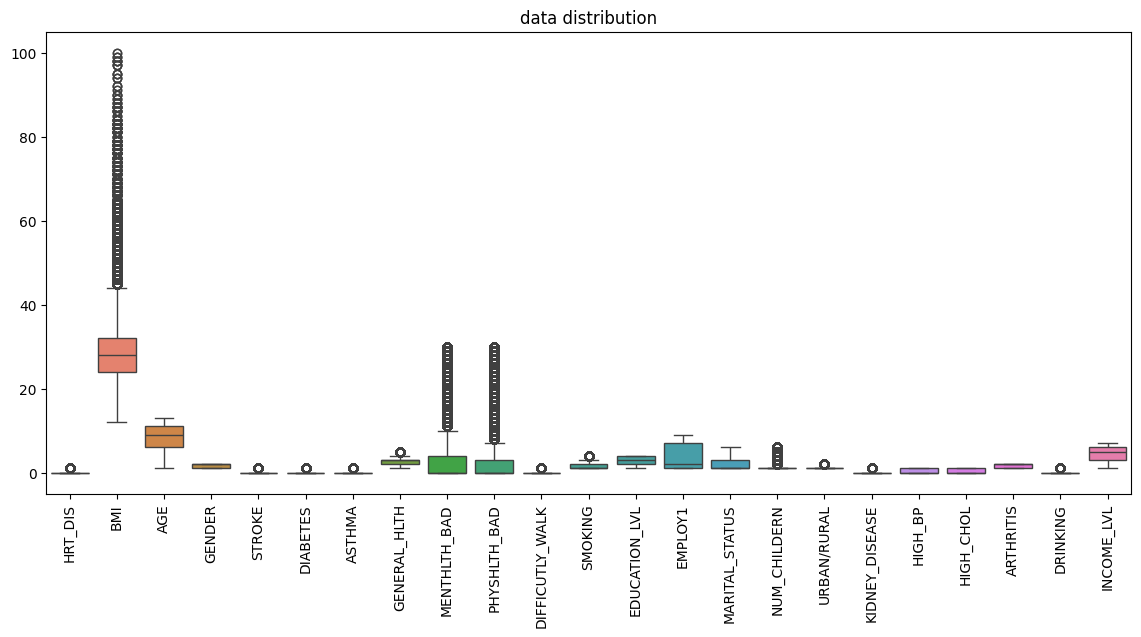

In [ ]:

plt.figure(figsize=(14,6))
sns.boxplot(df)
l=list(np.arange(23))
plt.title("data distribution")
plt.xticks(l, list(df.columns), rotation=90)
plt.show()

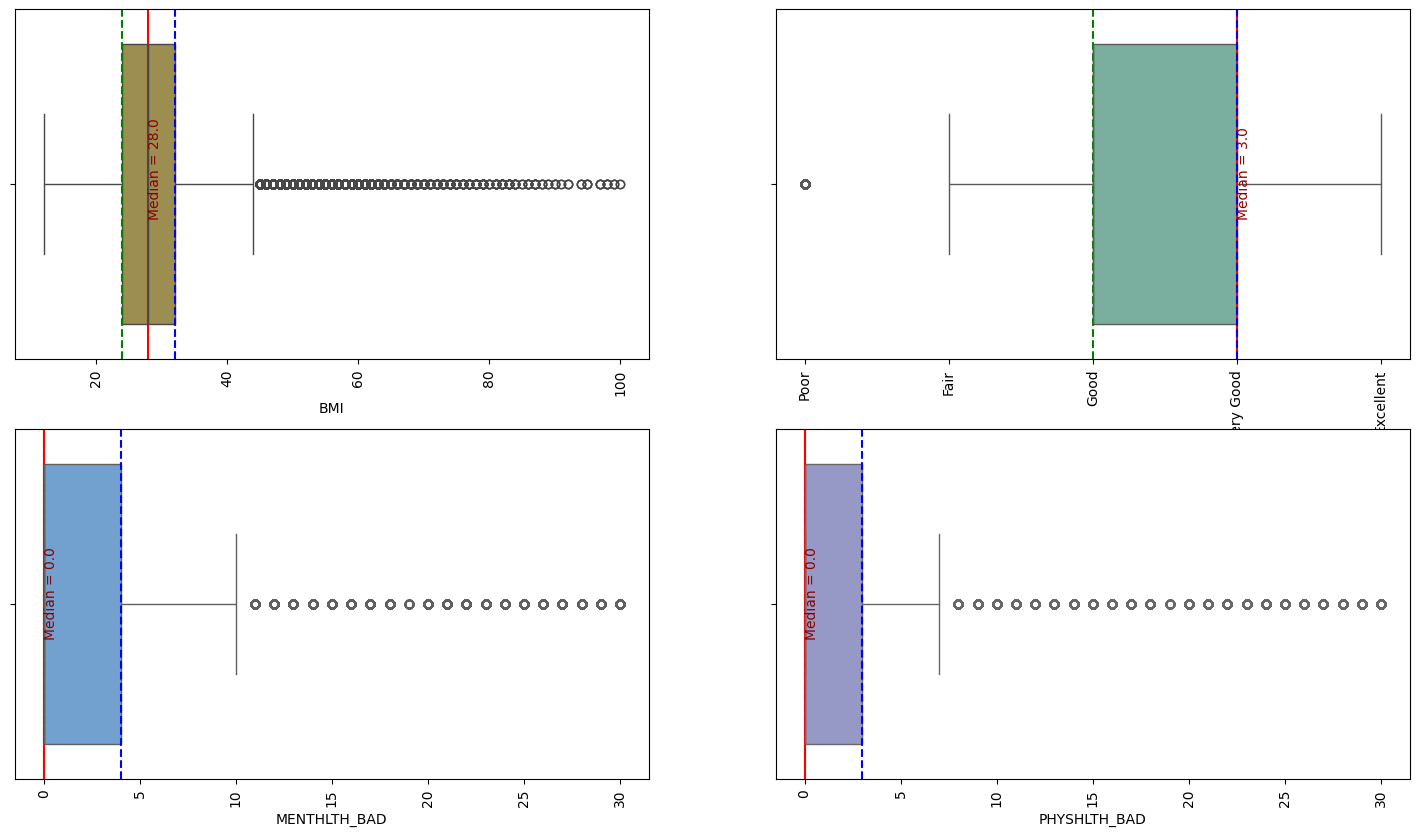

In [ ]:
def plotaxis(pval,paxis):
  q1 = np.percentile(df[pval], 25)
  q2 = np.percentile(df[pval], 50)
  q3 = np.percentile(df[pval], 75)

  paxis.text(q2, 0.1, f'Median = {q2:.1f}', color='darkred', verticalalignment='bottom', rotation=90)

  paxis.axvline(q1, color='green', linestyle='--')
  paxis.axvline(q2, color='red', linestyle='-', label='Q2')
  paxis.axvline(q3, color='blue', linestyle='--')

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

sns.boxplot(ax=axes[0, 0], x=vis_df['BMI'], color='#a89444')
# axes[0, 0].set_title('BMI Distribution')
plotaxis('BMI',axes[0, 0])

sns.boxplot(ax=axes[0, 1], x=vis_df['GENERAL_HLTH'], color='#72b6a1')
# axes[0, 1].set_title('General Health Distribution')
plotaxis('GENERAL_HLTH',axes[0, 1])

sns.boxplot(ax=axes[1, 0], x=vis_df['MENTHLTH_BAD'], color='#62a0de')
# axes[1, 0].set_title('Mental Health Distribution')
plotaxis('MENTHLTH_BAD',axes[1, 0])

sns.boxplot(ax=axes[1, 1], x=vis_df['PHYSHLTH_BAD'], color='#8e91ce')
# axes[1, 1].set_title('Physical Health Distribution')
plotaxis('PHYSHLTH_BAD',axes[1, 1])

for ax in axes.flat:
    ax.tick_params(axis='x', labelrotation=90)

plt.tight_layout
plt.show()

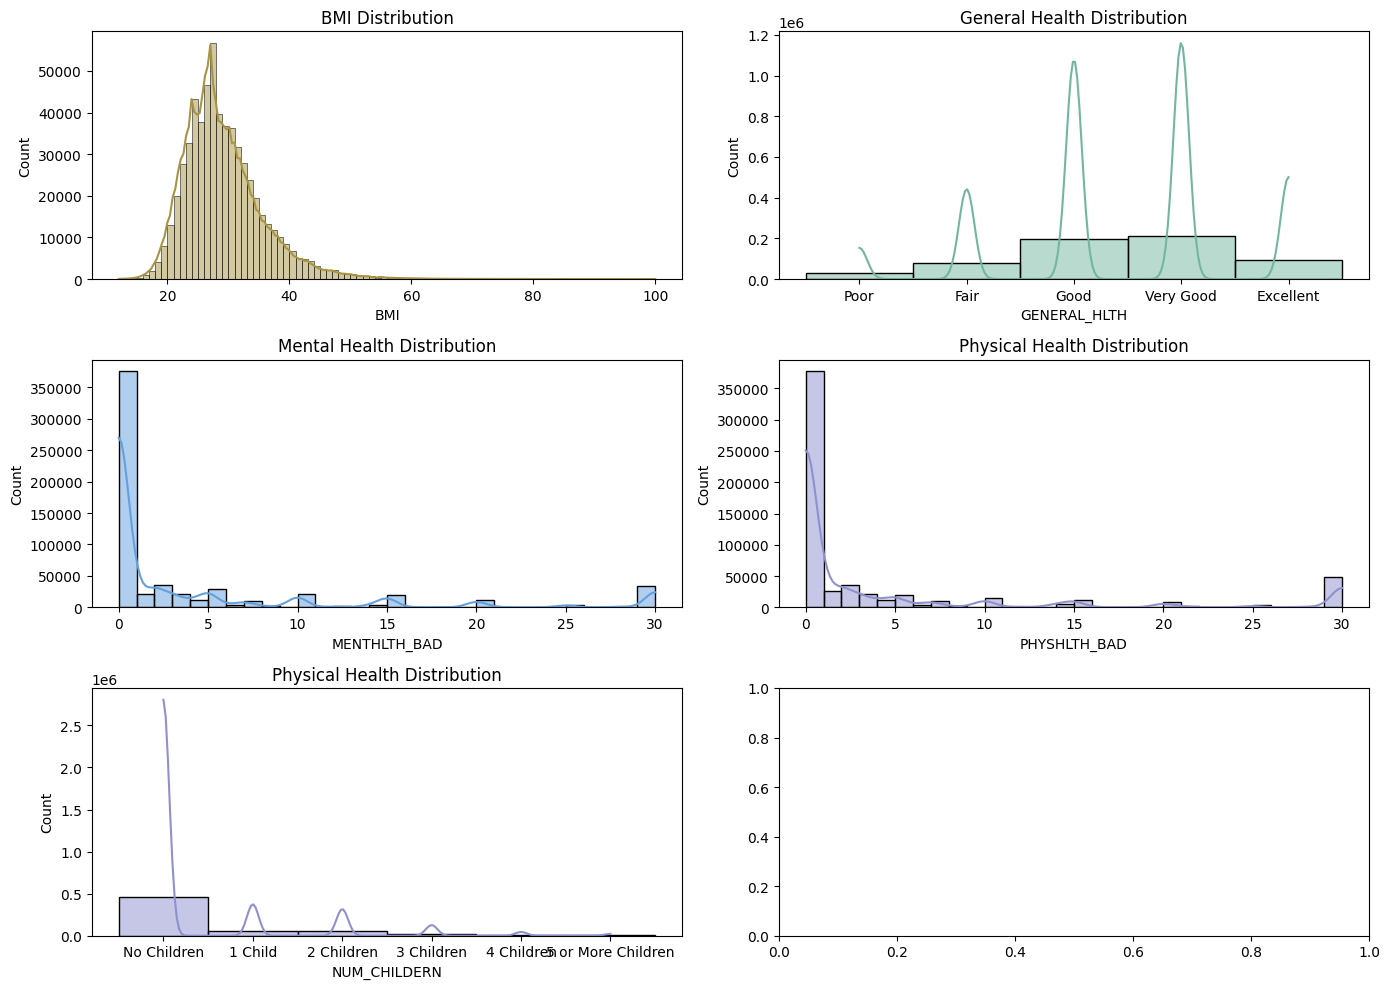

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(14, 10))

sns.histplot(vis_df['BMI'], ax=axes[0, 0], kde=True, binwidth=1, color='#a89444')
axes[0, 0].set_title('BMI Distribution')

sns.histplot(vis_df['GENERAL_HLTH'], ax=axes[0, 1], kde=True, binwidth=1, color='#72b6a1')
axes[0, 1].set_title('General Health Distribution')

sns.histplot(vis_df['MENTHLTH_BAD'], ax=axes[1, 0], kde=True, binwidth=1, color='#62a0de')
axes[1, 0].set_title('Mental Health Distribution')

sns.histplot(vis_df['PHYSHLTH_BAD'], ax=axes[1, 1], kde=True, binwidth=1, color='#8e91ce')
axes[1, 1].set_title('Physical Health Distribution')

sns.histplot(vis_df['NUM_CHILDERN'], ax=axes[2, 0], kde=True, binwidth=1, color='#8e91ce')
axes[2, 0].set_title('Physical Health Distribution')

plt.tight_layout()
plt.show()

## 1. Outlier Flagging

In [ ]:
# BMI _ FLAG
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_BMI'] = ((df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)).astype(int)


In [ ]:
# MENTHLTH_BAD _ FLAG
Q1 = df['MENTHLTH_BAD'].quantile(0.25)
Q3 = df['MENTHLTH_BAD'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_MENTHLTH_BAD'] = ((df['MENTHLTH_BAD'] < lower_bound) | (df['MENTHLTH_BAD'] > upper_bound)).astype(int)


In [ ]:
# PHYSHLTH_BAD _ FLAG
Q1 = df['PHYSHLTH_BAD'].quantile(0.25)
Q3 = df['PHYSHLTH_BAD'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_PHYSHLTH_BAD'] = ((df['PHYSHLTH_BAD'] < lower_bound) | (df['PHYSHLTH_BAD'] > upper_bound)).astype(int)


In [ ]:
# NUM_CHILDERN _ FLAG
Q1 = df['NUM_CHILDERN'].quantile(0.25)
Q3 = df['NUM_CHILDERN'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Creating the flag
df['OUTLIER_NUM_CHILDERN'] = ((df['NUM_CHILDERN'] < lower_bound) | (df['NUM_CHILDERN'] > upper_bound)).astype(int)


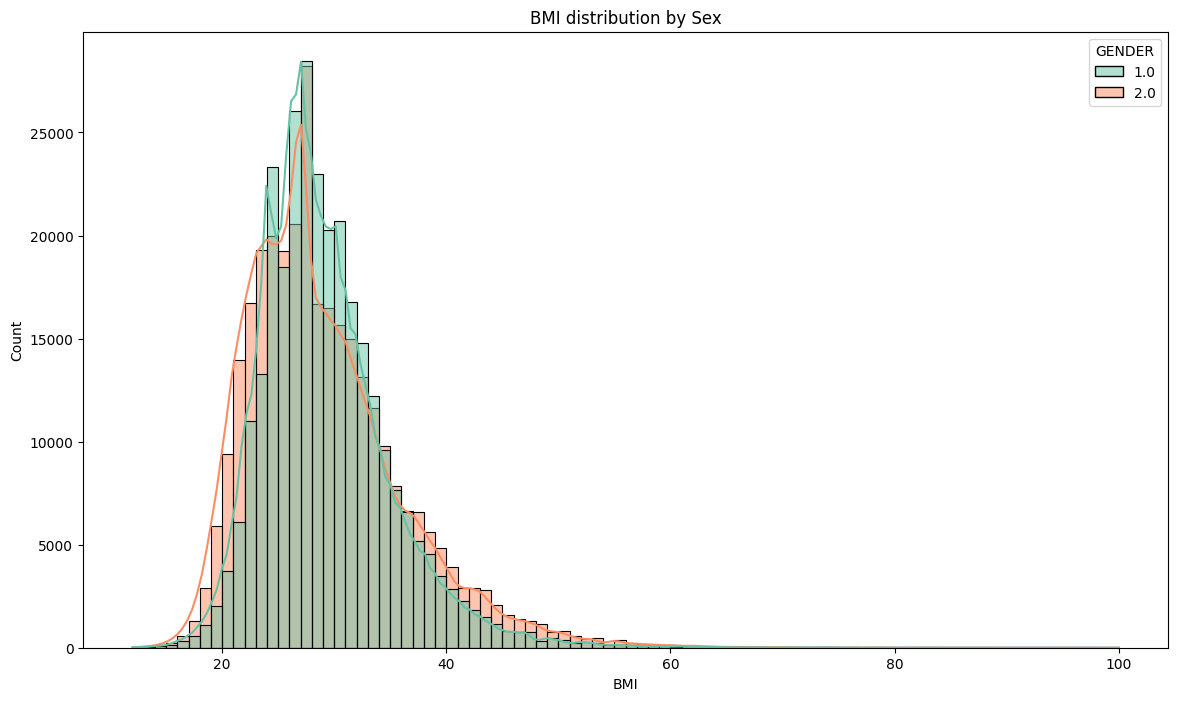

In [ ]:
plt.figure(figsize=(14,8))  # Adjust the figure size as needed
sns.histplot(df, x='BMI', kde=True, binwidth=1 , palette="Set2", hue='GENDER')
plt.title('BMI distribution by Sex')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

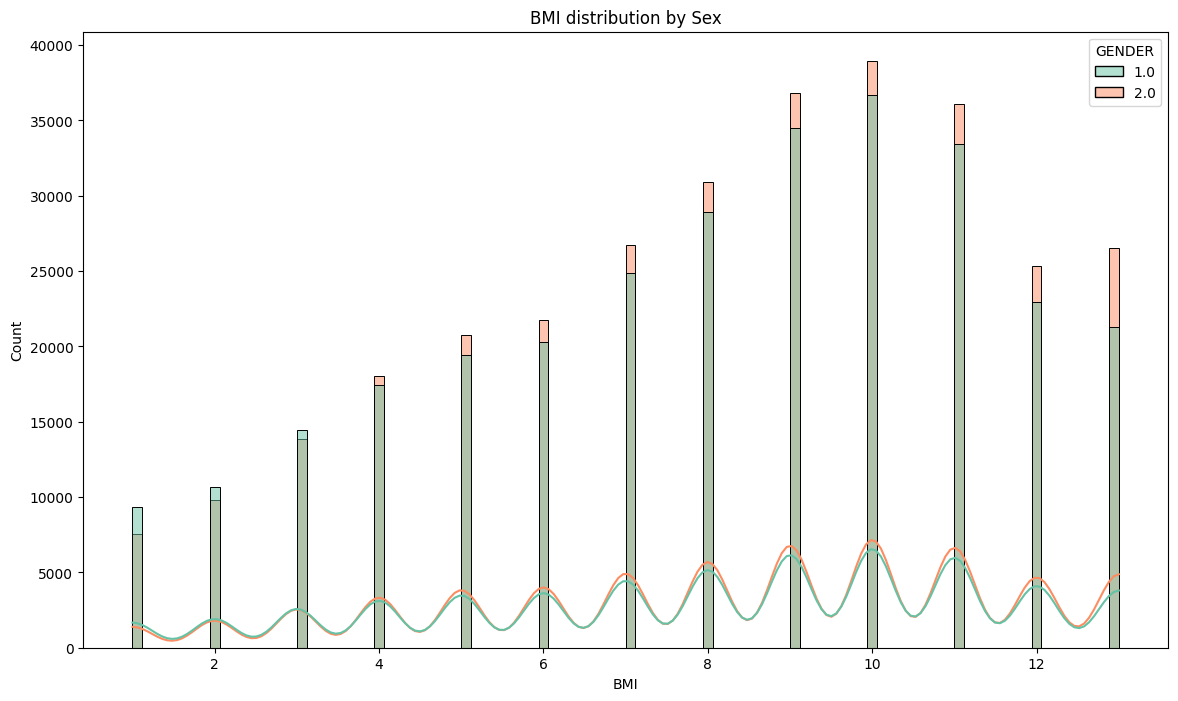

In [ ]:
plt.figure(figsize=(14,8))  # Adjust the figure size as needed
sns.histplot(df, x='AGE', palette="Set2", hue='GENDER', kde =True)
plt.title('BMI distribution by Sex')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

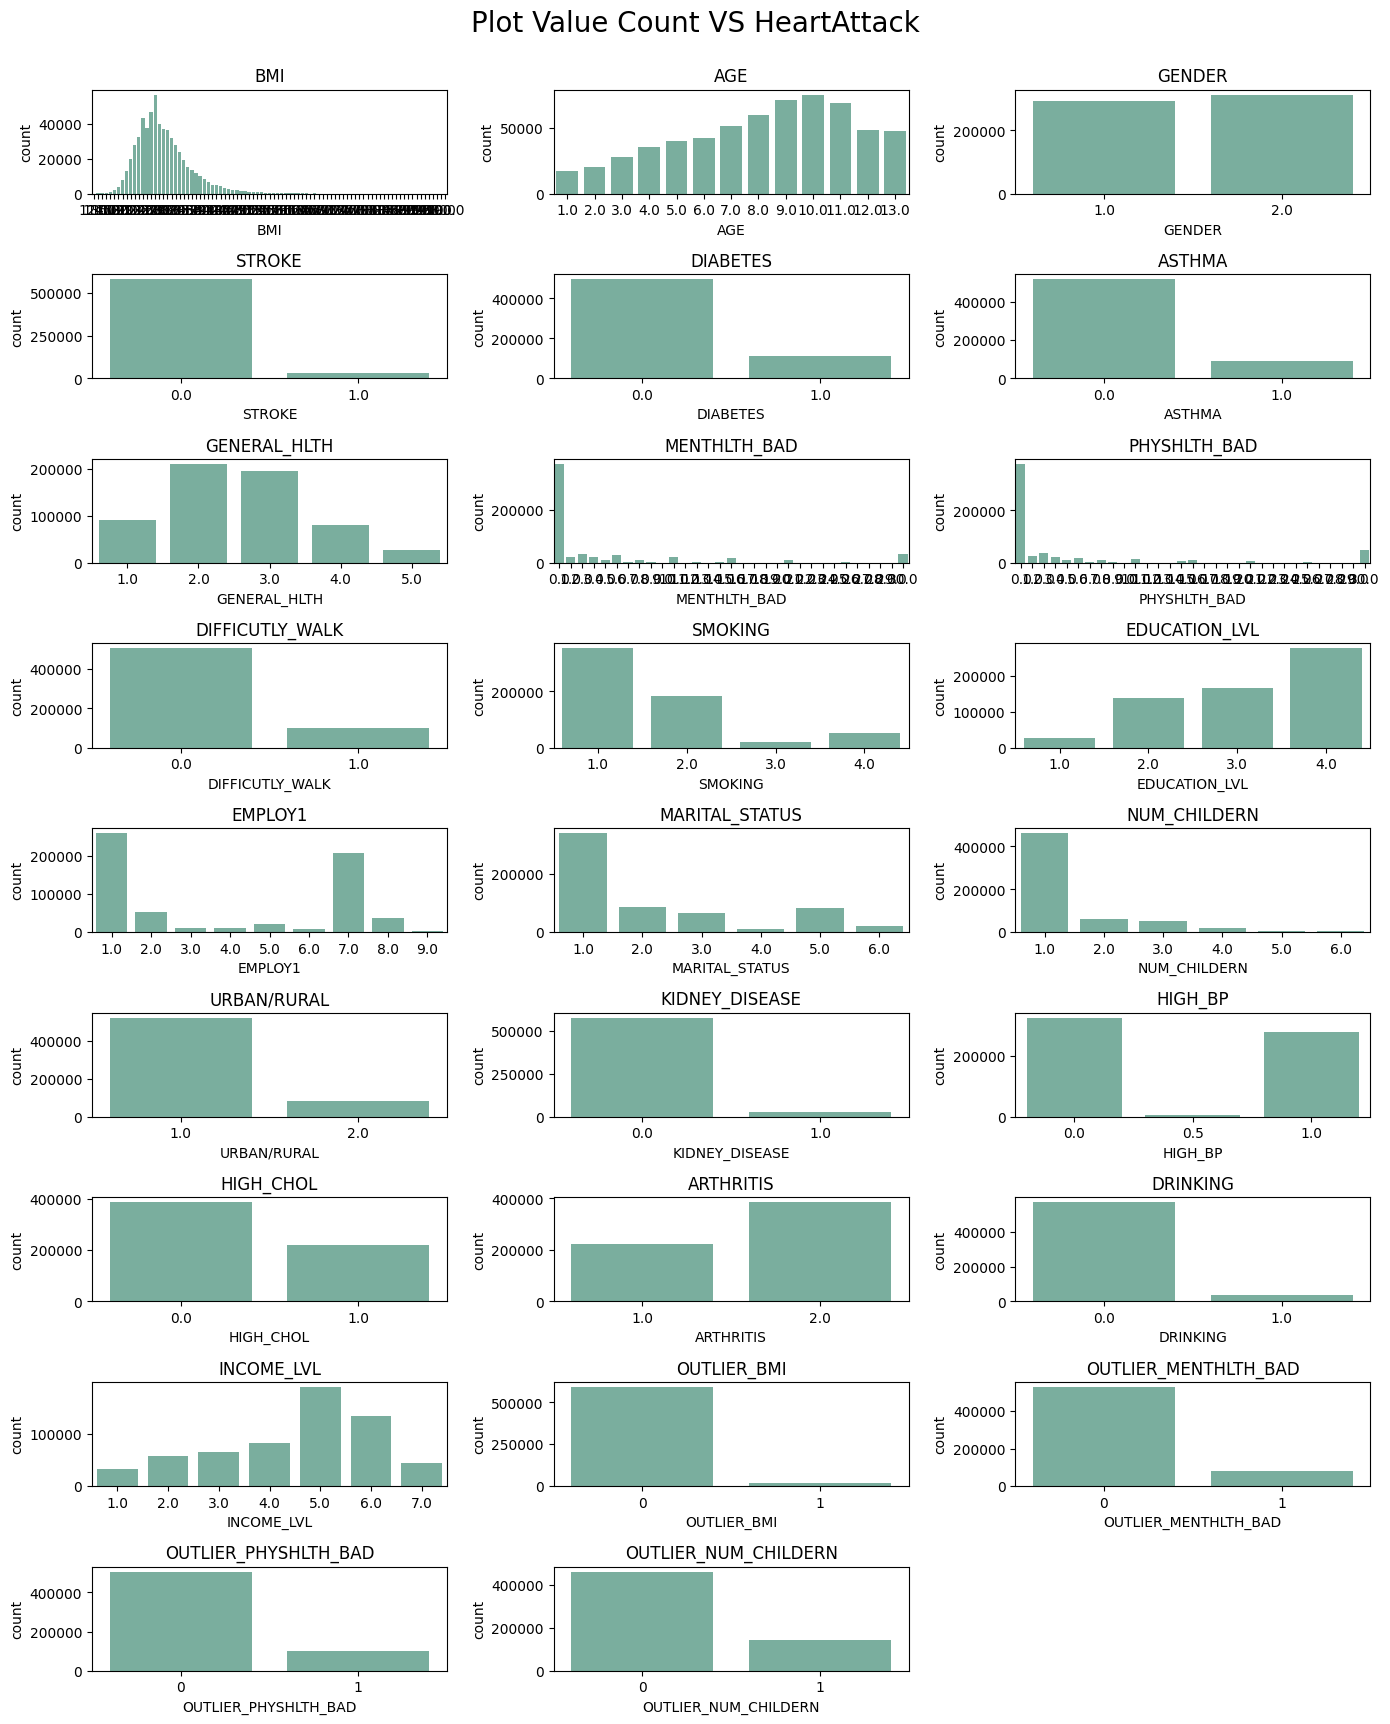

In [ ]:
plt.figure(figsize=(14,50))
for i,column in enumerate(df.columns[1:]):
    plt.subplot(len(df.columns), 3, i+1)
    plt.suptitle("Plot Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
    sns.countplot(data=df, x=column, color='#72b6a1')
    plt.title(f"{column}")
    plt.tight_layout()

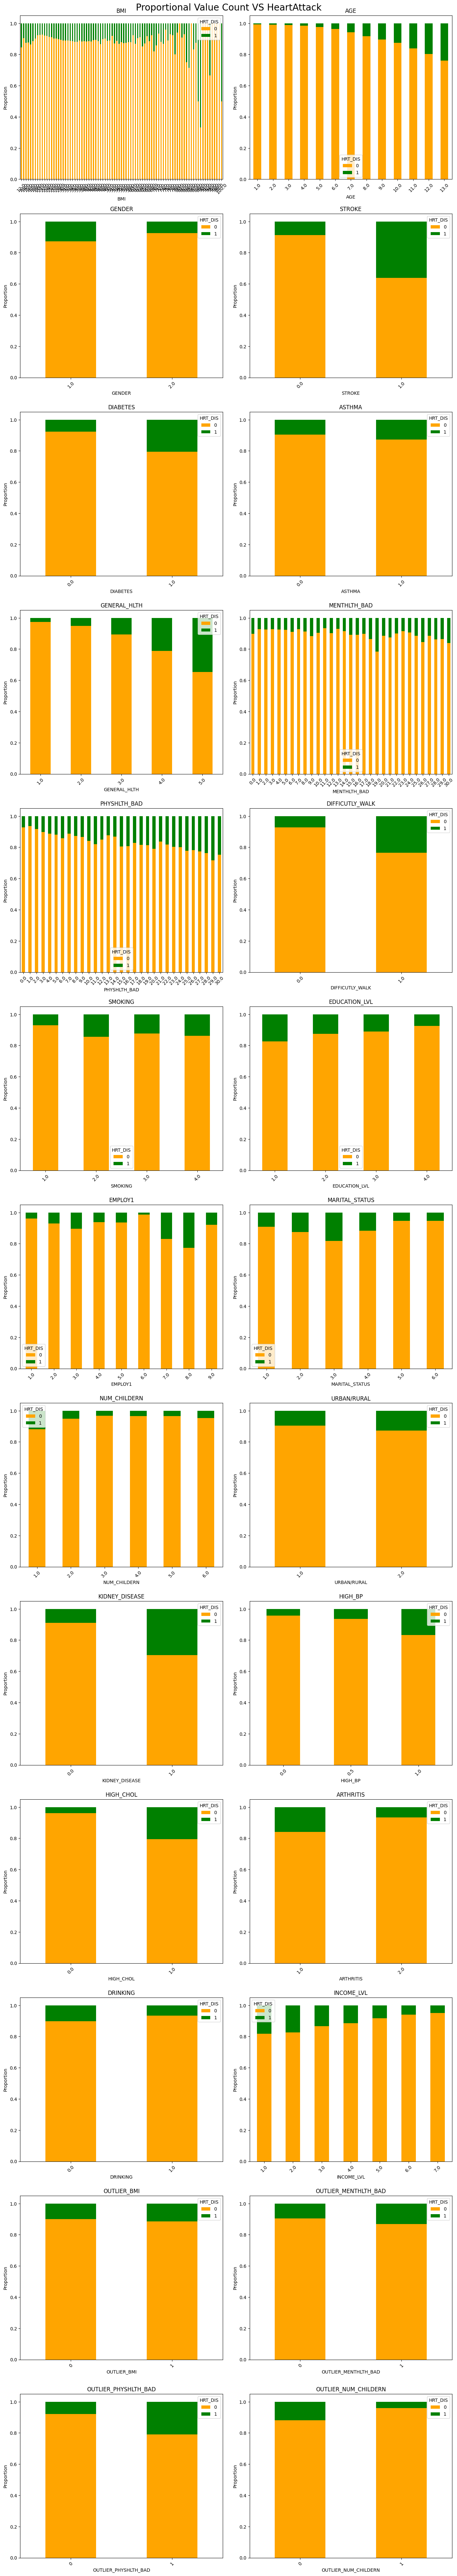

In [ ]:
plt.figure(figsize=(14, 6 * (df.shape[1] - 1)))  # Adjusting height based on the number of columns
for i, column in enumerate(df.columns[1:]):
    plt.subplot(len(df.columns) - 1, 2, i + 1)

    # Calculate the normalized count
    count_data = df.groupby(column, observed=False)['HRT_DIS'].value_counts(normalize=True).unstack().fillna(0)

    # Create a bar plot
    count_data.plot(kind='bar', stacked=True, color=['orange', 'green'], ax=plt.gca())

    plt.title(f"{column}")
    plt.xlabel(column)
    plt.ylabel("Proportion")
    plt.xticks(rotation=45)
    plt.legend(title='HRT_DIS', labels=['0', '1'])
    plt.tight_layout()

plt.suptitle("Proportional Value Count VS HeartAttack", fontsize=20, x=0.5, y=1)
plt.show()

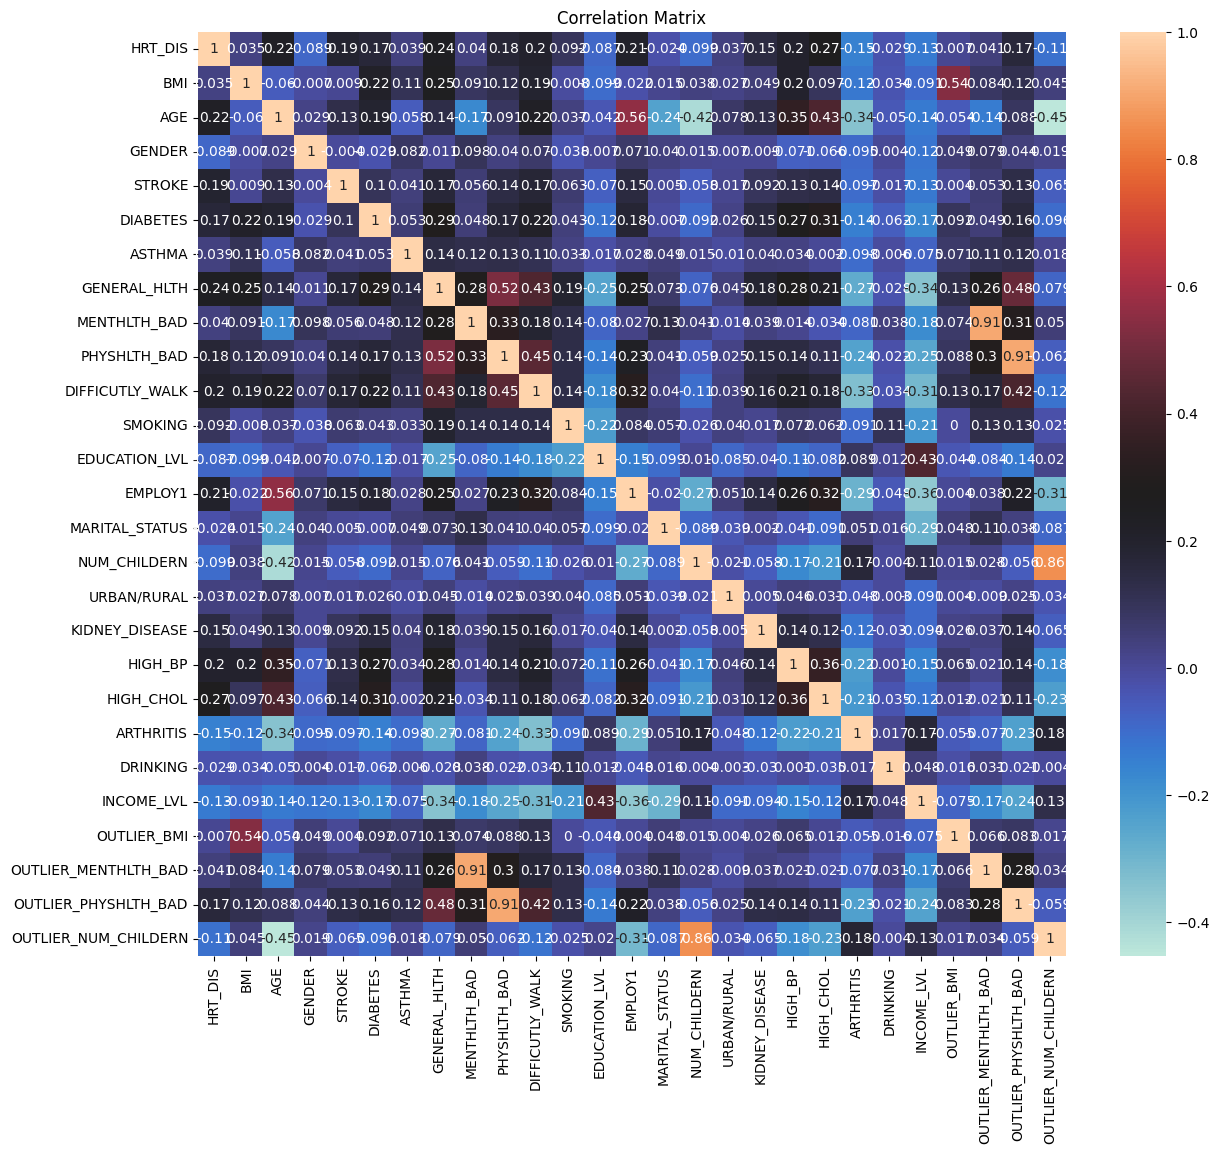

In [ ]:
# Correlation Matrix

plt.figure(figsize=(14,12))
corr_matrix = df.corr().round(3)
sns.heatmap(corr_matrix, annot=True, cmap='icefire')
plt.title('Correlation Matrix')
plt.show()

# **6. Machine Learning**

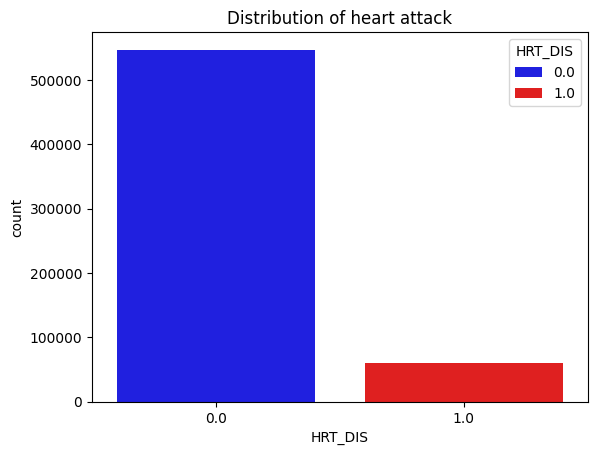

In [ ]:
# Data Proportion Heart Disease Distribution in Data

sns.countplot(data=df, x="HRT_DIS", hue='HRT_DIS', palette=['blue', 'red'])
plt.title("Distribution of heart attack")
plt.show()

In [ ]:
 df.corr()['HRT_DIS'].sort_values(ascending=False)

,HRT_DIS
HRT_DIS,1.000000
HIGH_CHOL,0.267414
GENERAL_HLTH,0.245331
AGE,0.224415
EMPLOY1,0.207125
HIGH_BP,0.205340
DIFFICUTLY_WALK,0.202477
STROKE,0.190463
PHYSHLTH_BAD,0.176800
DIABETES,0.168366


In [ ]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['HRT_DIS'])
y = df['HRT_DIS']

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=17)

X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert resampled data back to pandas DataFrame
X_newdf = pd.DataFrame(X_resampled, columns=X.columns)
y_newseries = pd.Series(y_resampled, name=y.name)
newdf = pd.concat([X_newdf, y_newseries], axis=1)

In [ ]:
df.shape

(607558, 27)

In [ ]:
newdf.shape

(1093718, 27)

In [ ]:
X=newdf.drop(columns=['HRT_DIS','DRINKING','MARITAL_STATUS','MENTHLTH_BAD'])
y=newdf['HRT_DIS']

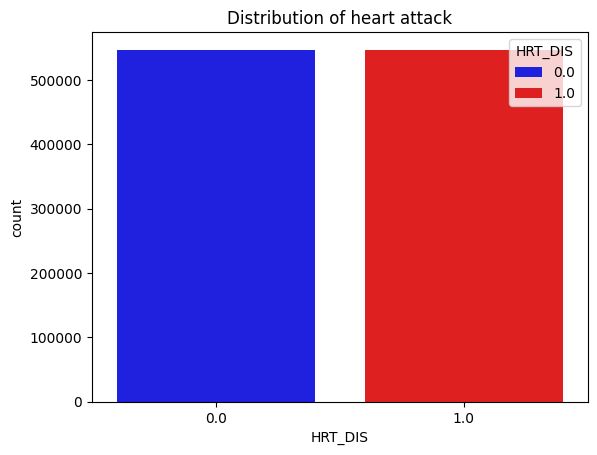

In [ ]:
# Data Proportion Heart Disease Distribution in Data

sns.countplot(data=newdf, x="HRT_DIS", hue='HRT_DIS', palette=['blue', 'red'])
plt.title("Distribution of heart attack")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=17)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report ,confusion_matrix,ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from xgboost import XGBClassifier


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'Ada Boosting':AdaBoostClassifier(),
    "XGBClassifier":XGBClassifier()
}

Training Logistic Regression...
              precision    recall  f1-score   support

         0.0       0.81      0.75      0.78    136856
         1.0       0.77      0.83      0.79    136574

    accuracy                           0.79    273430
   macro avg       0.79      0.79      0.79    273430
weighted avg       0.79      0.79      0.79    273430

Logistic Regression Accuracy: 78.67%



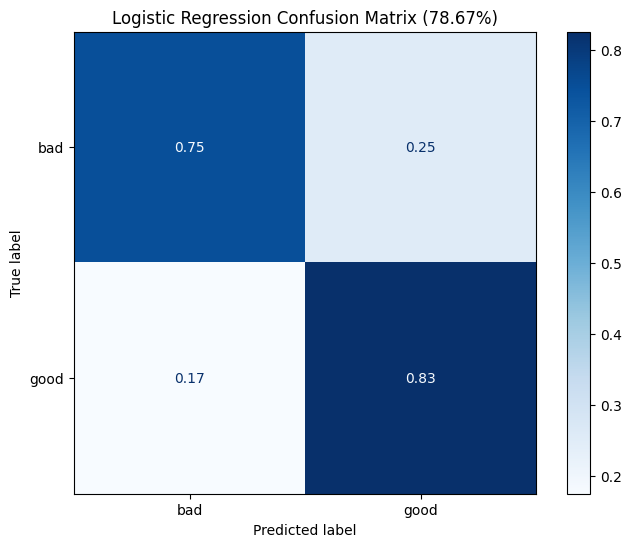

Training KNN...
              precision    recall  f1-score   support

         0.0       0.94      0.84      0.88    136856
         1.0       0.85      0.94      0.90    136574

    accuracy                           0.89    273430
   macro avg       0.89      0.89      0.89    273430
weighted avg       0.89      0.89      0.89    273430

KNN Accuracy: 89.02%



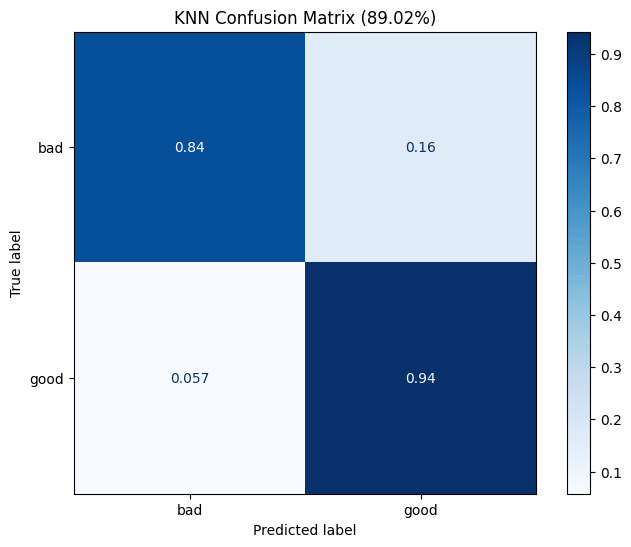

Training Decision Tree...
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91    136856
         1.0       0.91      0.92      0.91    136574

    accuracy                           0.91    273430
   macro avg       0.91      0.91      0.91    273430
weighted avg       0.91      0.91      0.91    273430

Decision Tree Accuracy: 91.22%



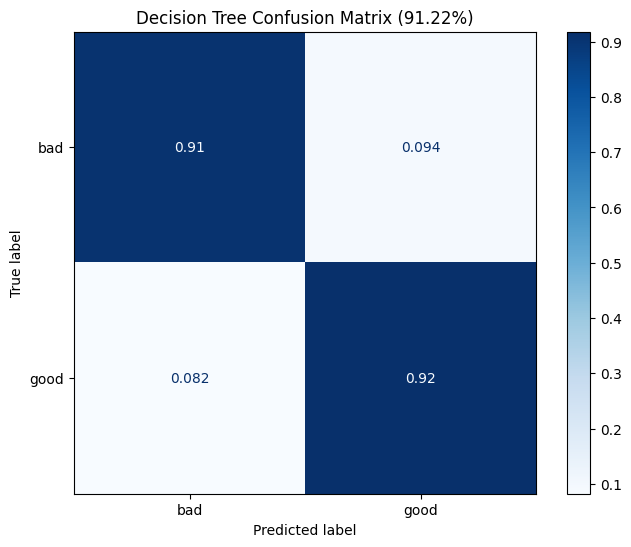

Training Random Forest...
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94    136856
         1.0       0.97      0.91      0.94    136574

    accuracy                           0.94    273430
   macro avg       0.94      0.94      0.94    273430
weighted avg       0.94      0.94      0.94    273430

Random Forest Accuracy: 94.26%



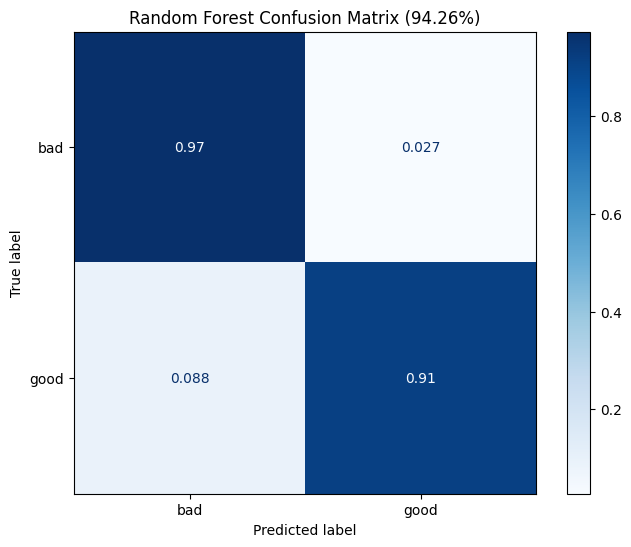

Training Bagging...
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94    136856
         1.0       0.96      0.91      0.93    136574

    accuracy                           0.94    273430
   macro avg       0.94      0.94      0.94    273430
weighted avg       0.94      0.94      0.94    273430

Bagging Accuracy: 93.58%



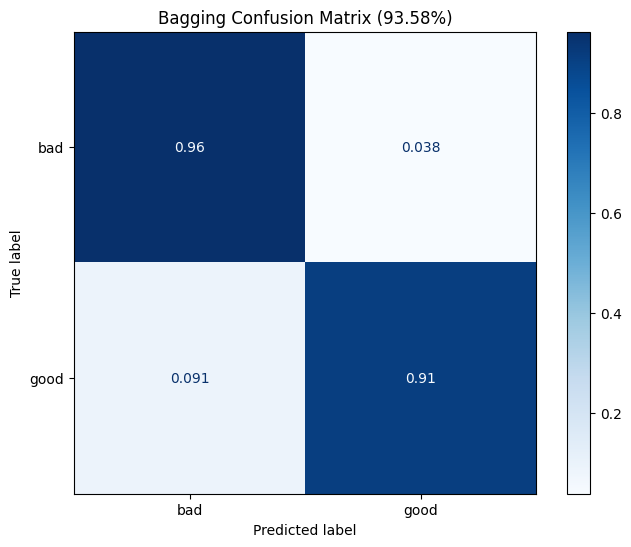

Training Ada Boosting...
              precision    recall  f1-score   support

         0.0       0.89      0.88      0.88    136856
         1.0       0.88      0.89      0.89    136574

    accuracy                           0.89    273430
   macro avg       0.89      0.89      0.89    273430
weighted avg       0.89      0.89      0.89    273430

Ada Boosting Accuracy: 88.55%



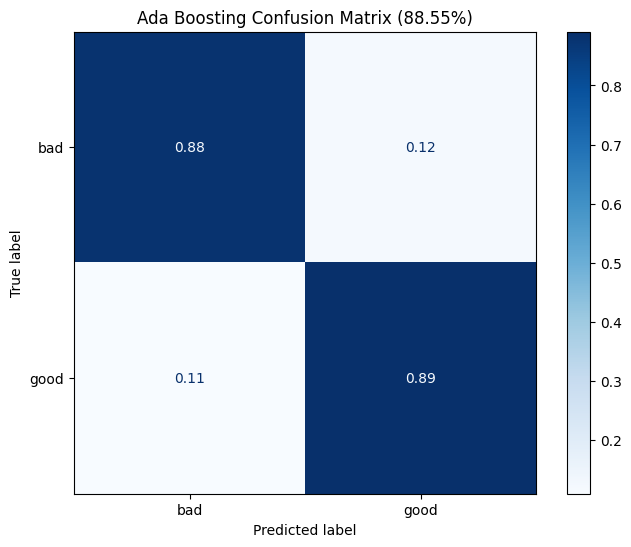

Training XGBClassifier...
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.94    136856
         1.0       0.99      0.90      0.94    136574

    accuracy                           0.94    273430
   macro avg       0.95      0.94      0.94    273430
weighted avg       0.95      0.94      0.94    273430

XGBClassifier Accuracy: 94.18%



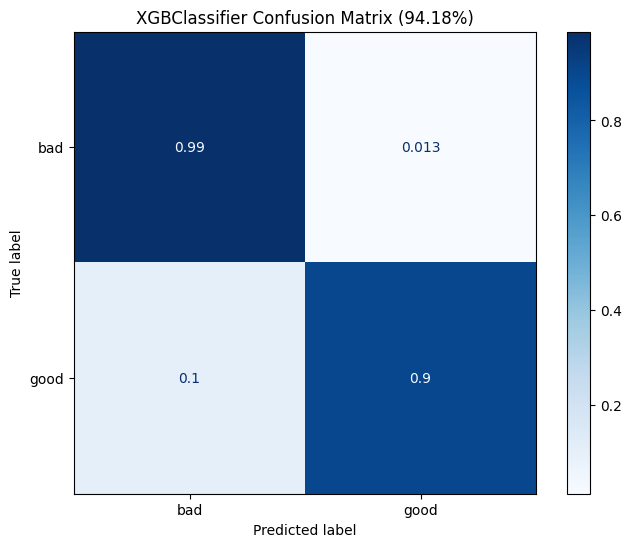

In [ ]:
accuracies = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy

    print(classification_report(y_test, y_pred))
    print(f"{name} Accuracy: {accuracy * 100:.2f}%\n")

    cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad','good'], )
    fig, ax = plt.subplots(figsize=(8,6))
    ax.set_title(f"{name} Confusion Matrix ({accuracy * 100:.2f}%)")
    disp.plot(ax=ax,cmap='Blues')
    plt.show()

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94    136856
         1.0       0.96      0.92      0.94    136574

    accuracy                           0.94    273430
   macro avg       0.94      0.94      0.94    273430
weighted avg       0.94      0.94      0.94    273430

StackingClassifier Accuracy: 93.80%



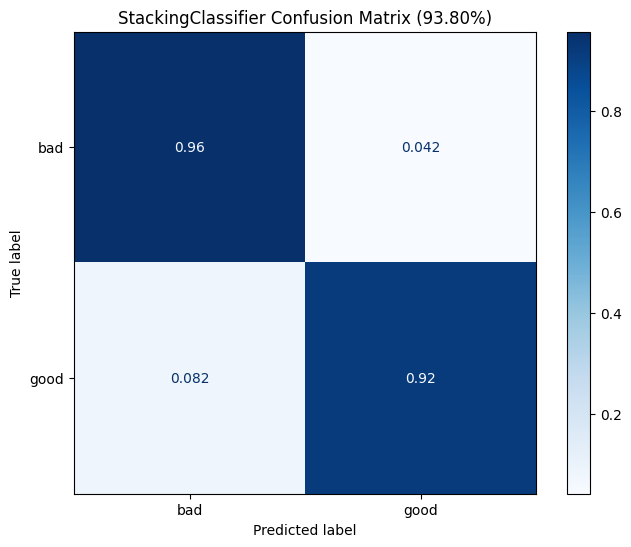

In [ ]:
from sklearn.ensemble import  GradientBoostingClassifier,StackingClassifier

# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=17)),
    ('bc', BaggingClassifier(n_estimators=10, random_state=17))
]

meta_model = LogisticRegression()

stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)
stacking_clf.fit(X_train, y_train)

y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracies['StackingClassifier'] = accuracy

models.update({'StackingClassifier':stacking_clf})

print(classification_report(y_test, y_pred))
print(f"StackingClassifier Accuracy: {accuracy * 100:.2f}%\n")

cm = confusion_matrix(y_test, y_pred.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['bad','good'], )
fig, ax = plt.subplots(figsize=(8,6))
ax.set_title(f"StackingClassifier Confusion Matrix ({accuracy * 100:.2f}%)")
disp.plot(ax=ax,cmap='Blues')
plt.show()

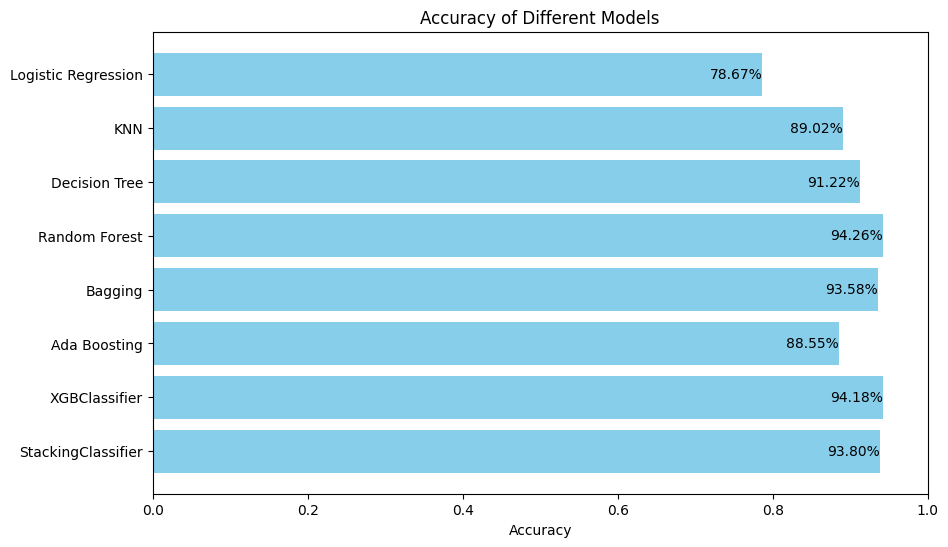

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.barh(list(accuracies.keys()), list(accuracies.values()), color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0, 1)
plt.gca().invert_yaxis()

for bar in bars:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height()/2, f'{width* 100:.2f}%', ha='right', va='center')

plt.show()
